# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


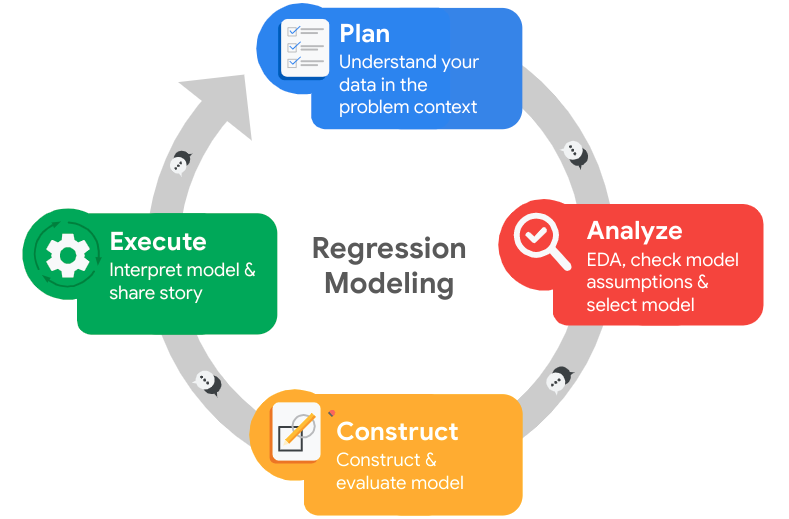

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




1. My stakeholders include Salifort Motors' senior leadership team, the Human Resources department, and employees affected by turnover. Additionally, managers and team leads who oversee day-to-day operations are key stakeholders.
2. I aim to identify key factors contributing to employee turnover and develop a predictive model to forecast whether an employee is likely to leave. The goal is to provide insights that help reduce turnover, improve job satisfaction, and optimize HR strategies.
3. There were a lot of duplicated rows (3008 | around 20% of overall data), which is concerning. We still have a decent amount of data to work with though (roughly 12000 rows). Two variables were categorical (department and salary). There were 824 outliers in the 'tenure' column, which I will have to decide what to do with once I progress further along.
4. I used some of the past projects to get all of the imports that I think I will need as I progress along. Otherwise, I didn't really need to use any other resources to evaluate the data so far.
5. At this stage, I don't have any ethical considerations with the data itself, but there are always things I should take into consideration with how the data/predictions are used i.e. preventing discrimination against employees who had workplace injuries if there is a strong link between accident history and turnover predictions.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages

# Data manipulation
import pandas as pd
import numpy as np 

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data modeling
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# from xgboost import XGBClassifier
# from xgboost import XGBRegressor
# from xgboost import plot_importance

# Metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, 
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
# from sklearn.tree import plot_tree

# Saving models
import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [4]:
# Gather basic information about the data
df0.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

### Gather descriptive statistics about the data

In [5]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [6]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [8]:
# Rename columns as needed
df0 = df0.rename(columns={'Work_accident': 'work_accident',
                         'Department': 'department',
                         'average_montly_hours': 'average_monthly_hours',
                         'left': 'left_company',
                         'time_spend_company': 'tenure'})


# Display all column names after the update
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left_company',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [9]:
# Check for missing values
df0.isna().sum()


satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left_company             0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [10]:
# Check for duplicates
df0.duplicated().sum()

3008

In [11]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head()


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left_company,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [12]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left_company,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

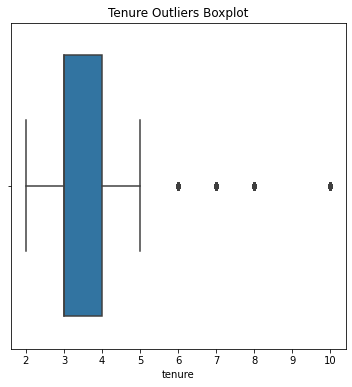

In [13]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(6,6))
plt.title('Tenure Outliers Boxplot')
sns.boxplot(x=df['tenure'])
plt.show()

In [14]:
# Determine the number of rows containing outliers
Q1 = df['tenure'].quantile(.25)
Q3 = df['tenure'].quantile(.75)
IQR = Q3 - Q1

# Define the upper/lower bounds
lower_bound = Q1 - 1.5 *IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outlier rows
outlier_count = df[(df['tenure'] < lower_bound) | (df['tenure'] > upper_bound)].shape[0]
print(f"Number of rows containing outliers in tenure: {outlier_count}")

Number of rows containing outliers in tenure: 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




1. Refer to insights below.
2. satisfaction_level primarily showed a bimodel distribtuion, meaning that there is a clear difference between employees who stayed and those who left considering their satisfaction levels.
3. I created a correlation heatmap to help identify key relationships then primarily used boxplots to compare the categorical variables that didn't show up on the heatmap. 
4. Identify key predictors, detect non-linear relationships (such as those with seven projects all leave), understand categorical variables, and detect any outliers.
5. Past projects from this course and ChatGPT helped.
6. No more than in the first stage.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [20]:
# Get numbers of people who left vs. stayed
df['left_company'].value_counts()

# Get percentages of people who left vs. stayed
df['left_company'].value_counts(normalize=True)


0    0.833959
1    0.166041
Name: left_company, dtype: float64

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

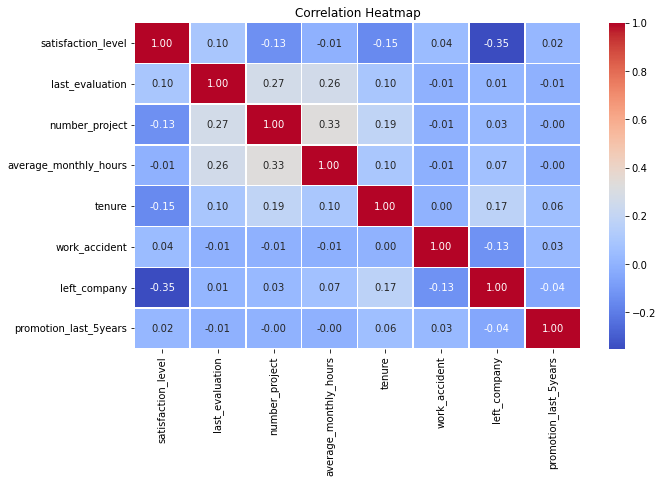

In [24]:
# Start with a heatmap to get an idea of what variables are correlated with each other
# Heatmap of variables
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

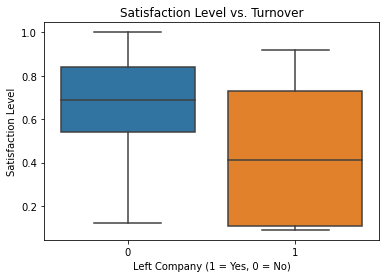

In [27]:
# Create a boxplot to look at general satisfaction levels of those who stayed vs left
sns.boxplot(x=df['left_company'], y=df['satisfaction_level'])
plt.title("Satisfaction Level vs. Turnover")
plt.xlabel("Left Company (1 = Yes, 0 = No)")
plt.ylabel("Satisfaction Level")
plt.show()

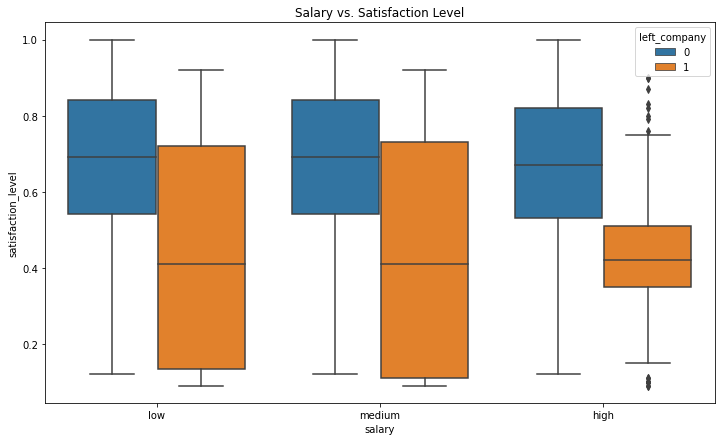

In [50]:
# Determine if salary affects satisfaction level
plt.figure(figsize=(12,7))
sns.boxplot(x=df['salary'], y=df['satisfaction_level'], hue=df['left_company'])
plt.title("Salary vs. Satisfaction Level")
plt.show()


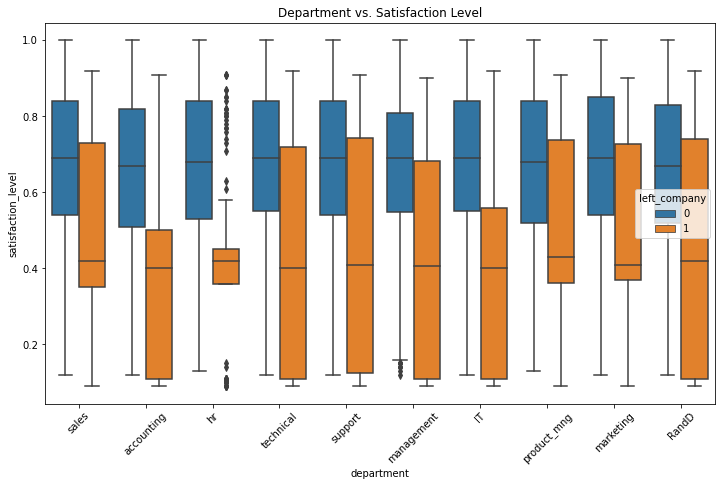

In [48]:
# Determine if department affects satisfaction levels
plt.figure(figsize=(12,7))
sns.boxplot(x=df['department'], y=df['satisfaction_level'], hue=df['left_company'])
plt.xticks(rotation=45)
plt.title("Department vs. Satisfaction Level")
plt.show()

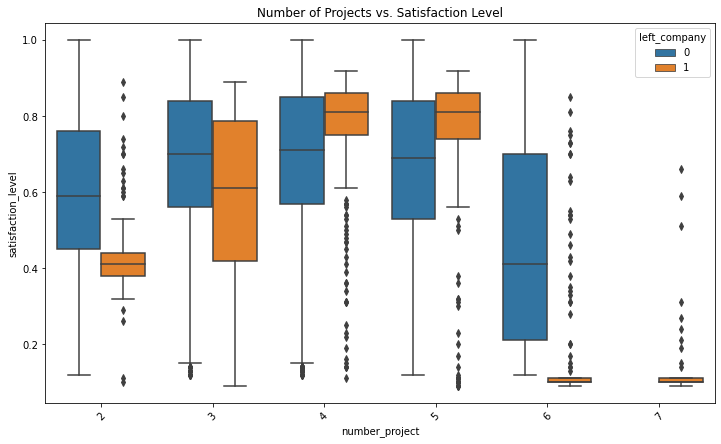

In [52]:
# Determine if number of projects affects satisfaction levels
plt.figure(figsize=(12,7))
sns.boxplot(x=df['number_project'], y=df['satisfaction_level'], hue=df['left_company'])
plt.xticks(rotation=45)
plt.title("Number of Projects vs. Satisfaction Level")
plt.show()

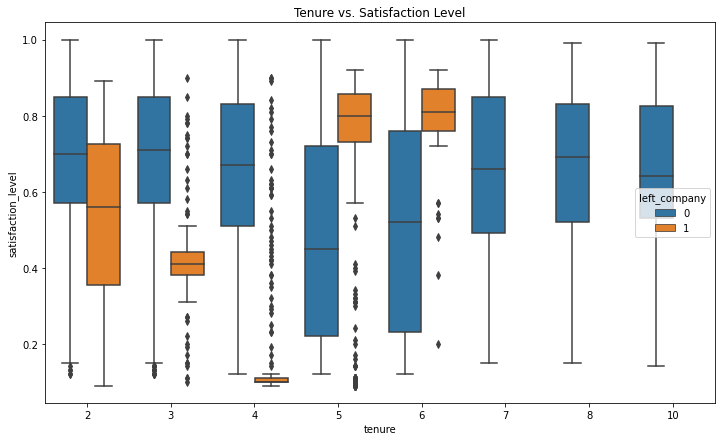

In [46]:
# Determine if tenure affects satisfaction levels
plt.figure(figsize=(12,7))
sns.boxplot(x=df['tenure'], y=df['satisfaction_level'], hue=df['left_company'])
plt.title("Tenure vs. Satisfaction Level")
plt.show()


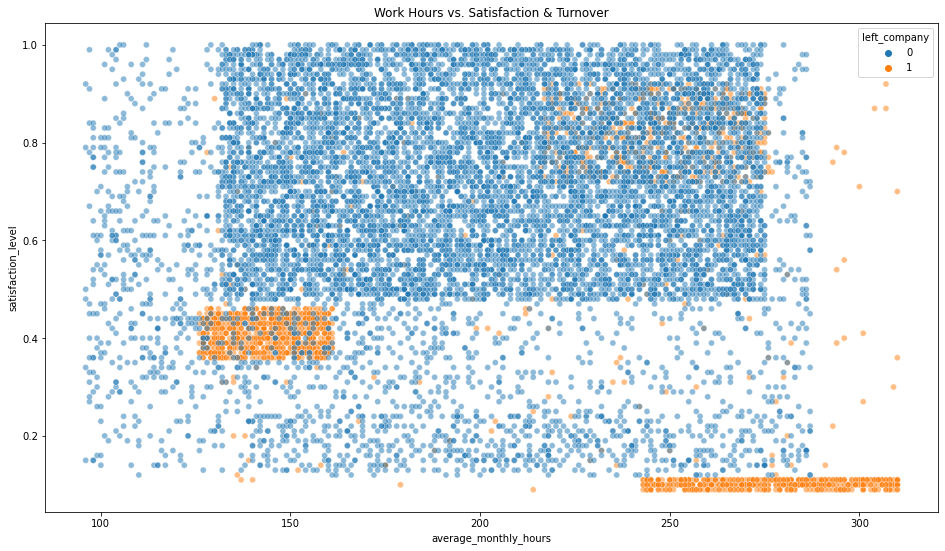

In [39]:
# Scatterplot to determine if work hours lead to lower satisfaction then turnover
plt.figure(figsize=(16,9))
sns.scatterplot(x=df['average_monthly_hours'], y=df['satisfaction_level'], hue=df['left_company'], alpha=.5)
plt.title("Work Hours vs. Satisfaction & Turnover")
plt.show()

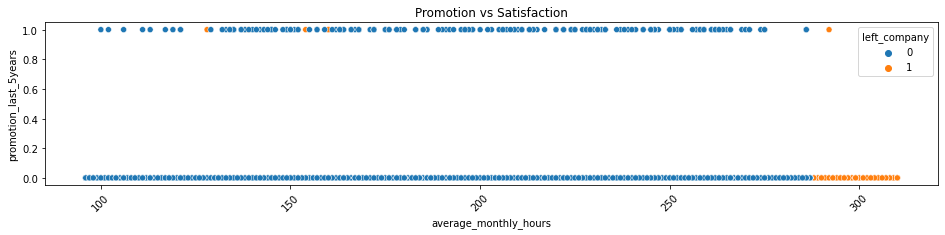

In [60]:
# See if lack of promotions led to lower satisfaction levels
plt.figure(figsize=(16, 3))
sns.scatterplot(x=df['average_monthly_hours'], y=df['promotion_last_5years'], hue=df['left_company'])
plt.xticks(rotation=45)
plt.title("Promotion vs Hours Worked")
plt.show()


### Insights

I made eight plots to dig into the data.

1. I started with a heatmap to get a general consensus of how the variables correlate with each other. The biggest correlation between all of the variables regarding who leaves the company was 'satisfaction_level'(-.35). 
2. Because of the insights from the heatmap, I started to see what variables correlated with satisfaction_level. This boxplot showed that people with lower satisfaction levels (IQR of .1 to .7) tended to leave while people with an IQR between .6-.8 tended to stay.
3. Since 'salary' and 'department' are categorical variables, they didn't show up on the heatmap. I took this time to evaluate if salary affected satisfaction levels, which it didn't according to this boxplot.
4. As mentioned above, I took the same approach with departments and didn't find too big of differences among departments — those with lower satisfaction levels tended to leave.
5. This is where some of the data got interesting. Those who left the company that had 4-5 projects had a general higher satisfaction of the same group of employees who stayed. Furthermore, every employee who was a part of seven projects left. 
6. People who had been at the company for seven years or longer didn't leave the company. Surprisingly, there were employees who left who had worked there for 5-6 years that had a higher general satisfaction level than those who stayed.
7. This scatterplot shows a few distinct groups. The first is a group of people who worked 250 to 320 hours a month (60 to 80 hours per week) and had ~0/.1 satisfaction level and left. Another group worked regular hours (40 hours a week) with ~.4 satisfaction level and left. The last group worked 215-275 hours per month with around ~.8 satisfaction level that left. 
8. I chose to focus on one subset from the scatterplot above: whether working those long hours resulted in getting a promotion. Those that worked extremely long hours and didn't receive a promotion all left.


# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



1. There doesn't seem to be anything odd in the data, but some variables like "salary" had low feature importance, which I thought was kind of surprising. The scatterplot above was also interesting in that there were very distinct groupings of data.
2. I chose to use all of the variables in the data except satisfaction since satisfaction is pretty vague, while the other variables are not.
3. Since the model used is a Random Forest, many of the assumptions for linear models (such as linearity and homoscedasticity) don't apply. However, it assumes that features are informative and non-redundant, which seems reasonable based on feature importance.
4. All the metrics I used to evaluate the model were relatively high (Accuracy: 0.9712 Precision: 0.9439 Recall: 0.8803 F1 Score: 0.9110 AUC: 0.9666), This indicated that the model fits the data effectievly and provides a reliable prediction for employee turnover.
5. I didn't do any hyperparameter tuning to optimize the model, but that could be done to make the model even better. Regardless, the model performs very well on the data as is.
6. I used the past course documents, ChatGPT, and parts of the Exemplar after I was done with the main coding practices to see if there were better ways of doing things.
7. Just in how the model is used, though race, gender, etc. aren't variables in the dataset so that shouldn't be of concern right now.

## Step 3. Model Building
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

My prediction task is to come up with a model that will predict whether an employee leaves the company or not. This is a binary classification problem.

### Identify the types of models most appropriate for this task.

The top models are logistic regression, decision tree, random forest, and XGBoost. Logistic regression and decision trees offer better interpretability, while random forest and XGBoost tend to be more accurate by capturing complex patterns and reducing overfitting.

### Modeling

Add as many cells as you need to conduct the modeling process.

In [86]:
# I will make a random forest model for this part of the project
# Create a copy of the dataframe
df1 = df.copy()

# Manually map 'low', 'medium', 'high' to 0, 1, 2
salary_mapping = {'low': 0, 'medium': 1, 'high': 2}

# Apply the mapping to the 'salary' column
df1['salary'] = df1['salary'].map(salary_mapping)

# Convert department to numeric
df1 = pd.get_dummies(df1, drop_first=False)

# Check values
df1.head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left_company,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
6,0.10,0.77,6,247,4,0,1,0,0,0,0,0,0,0,0,0,1,0,0
7,0.92,0.85,5,259,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
8,0.89,1.00,5,224,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
9,0.42,0.53,2,142,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [68]:
# Start by determining independent variable
y = df1['left_company']
X = df1.drop('left_company', axis =1)

In [69]:
# Split the data into training and testing sets (going with 80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [71]:
# Predict on the test set
y_pred = rf_model.predict(X_test)

In [77]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Calculate AUC (Area Under the ROC Curve)
y_prob = rf_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
auc = roc_auc_score(y_test, y_prob)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1998
           1       0.98      0.90      0.94       401

    accuracy                           0.98      2399
   macro avg       0.98      0.95      0.96      2399
weighted avg       0.98      0.98      0.98      2399

Accuracy: 0.9796
Precision: 0.9783
Recall: 0.8978
F1 Score: 0.9363
AUC: 0.9733


In [73]:
# Feature importance
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                   Feature  Importance
0       satisfaction_level    0.344510
2           number_project    0.177569
4                   tenure    0.169222
3    average_monthly_hours    0.148846
1          last_evaluation    0.121731
7                   salary    0.010720
5            work_accident    0.006993
17    department_technical    0.003026
15        department_sales    0.002947
16      department_support    0.002583
8            department_IT    0.001817
10   department_accounting    0.001743
9         department_RandD    0.001648
12   department_management    0.001515
11           department_hr    0.001386
14  department_product_mng    0.001295
13    department_marketing    0.001279
6    promotion_last_5years    0.001170


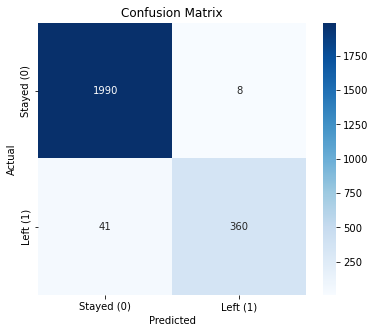

In [74]:
# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Stayed (0)', 'Left (1)'], yticklabels=['Stayed (0)', 'Left (1)'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [80]:
# Because satisfaction_level is pretty vague, I'm going to retrain the model without satisfaction as a variable
df2 = df1.copy() 
df2 = df2.drop('satisfaction_level', axis=1)
df2.head()

,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left_company,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [81]:
# Start by determining independent variable
y = df2['left_company']
X = df2.drop('left_company', axis =1)

# Split the data into training and testing sets (going with 80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

In [82]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Calculate AUC (Area Under the ROC Curve)
y_prob = rf_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
auc = roc_auc_score(y_test, y_prob)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

Accuracy: 0.9712
Precision: 0.9439
Recall: 0.8803
F1 Score: 0.9110
AUC: 0.9666


In [83]:
# Feature importance
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                   Feature  Importance
2    average_monthly_hours    0.278368
1           number_project    0.273847
3                   tenure    0.194619
0          last_evaluation    0.190324
6                   salary    0.018632
4            work_accident    0.011036
14        department_sales    0.004827
16    department_technical    0.004454
15      department_support    0.004089
7            department_IT    0.003037
9    department_accounting    0.002893
8         department_RandD    0.002881
10           department_hr    0.002506
13  department_product_mng    0.002392
5    promotion_last_5years    0.002184
12    department_marketing    0.002110
11   department_management    0.001801


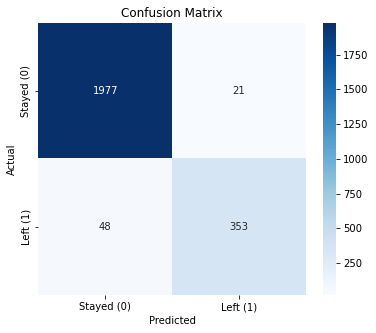

In [84]:
# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Stayed (0)', 'Left (1)'], yticklabels=['Stayed (0)', 'Left (1)'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

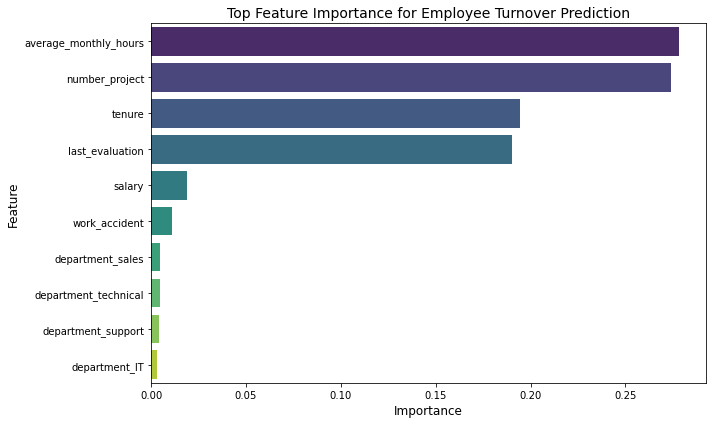

In [90]:
# Assuming rf_model and X are already defined and fitted
importances = rf_model.feature_importances_  # Feature importances
feature_names = X.columns  # Feature names from the input data

# Create a DataFrame to hold feature names and their importance values
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Select the top 6 features based on importance
top_features = feature_importance_df.head(10)

# Plotting the bar chart for the top 6 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')

# Add titles and labels
plt.title('Top Feature Importance for Employee Turnover Prediction', fontsize=14)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

In [87]:
# Save the model
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



1. There are four variables that impact employee turnover the most: average monthly hours, number of projects one is on, tenure at the company, and score on their last evaluation.
2. The company should focus on reducing employee turnover by addressing the high amount of hours certain employees work, capping the number of projects an employee can be on, and fostering some form of career development for employees with fewer years at the company. Last evaluation scores was also important in this model and that could be due to higher performing employees being sought after by competittors, are dissatisfied with their job growth, or feel like they are under pressure to keep up their performance.
3. I recommend implementing targeted retention strategies based on the identified risk factors, such as offering career growth opportunities for newer employees and ensuring workloads are balanced for those at risk of burnout.
4. Yes, the model could be improved with hyperparameter tuning to enhance performance. Additionally, incorporating more granular features such as employee engagement or specific department challenges might yield better predictions.
5. Other questions could include investigating specific departments or roles with high turnover rates, examining the impact of employee satisfaction beyond the available features, and predicting which employees might need more support or intervention.
6. Past projects, ChatGPT, and I used the Exemplar after my initial model was built to see if there are ways I could improve it.
7. None at this point.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

Accuracy (97.12%): This model had an accuracy of 97.12%, meaning that it predicted 97.12% of both employees who stayed and left correctly.

Precision (94.39%): This model had a precision of 94.39%, meaning that 94.39% of the employees predicted to leave actually left.

Recall (88.03%): This model had a recall of 88.03%, meaning that it correctly identified 88.03% of the employees who actually left.

F1 Score (91.10%): This model had an F1 score of 91.10%, meaning that it balanced precision and recall effectively, showing a good ability to identify employees who left while minimizing false positives.

AUC (96.66%): This model had an AUC of 96.66%, meaning that it had a strong ability to distinguish between employees who stayed and those who left, with a high true positive rate and a low false positive rate.

### Conclusion, Recommendations, Next Steps

Conclusion: 
This model does a very good job at predicting employee turnover. The highest areas of concern are working hours, number of projects, tenure, and last evaluation score, in that order.

Recommendations:
    1. Manage work hours more effectively — review the necessity of the long work hours. Expectations may need to be reduced, more flexible working conditions may be in order, or clearer compensation for overtime may need to be established.
    2. Limit the number of projects that an employee can be on as those that are on more projects tend to leave.
    3. Consider offering further promotions or leadership opportuniteis to employees who have been with the company for at least four years, as longer tenured employees are at risk of leaving.
    4. Consider aligning the evaluation process with long-term career development goals as those with higher evals tend to leave
    5. While salary had lower importance in this model, it is stil worth considering that it may have a significant effect on employees, especially those that are higher performing and/or working longer hours.
     

Next Steps:
    1. Validate this model's performance by testing other ML models like XGBoost or a decision tree model. There could also be further analysis on feature importance
    2. Implement targeted interventions for at-risk employees based on my recommendations above
    3. Track the impact of any of these targeted initiatives
    4. Revisit this model periodically as more data becomes available

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.